<a href="https://colab.research.google.com/github/Amolrakhunde/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**STEPS:**


*   STEP 0: Import Libraries and making DataFrame
*   STEP 1: Exploration
*   STEP 2: Looking for and handling NaN/Null/Missing Values
*   STEP 3: Each column wise trying to get some conclusions and trends
*   STEP 4: Trying to get some conclusions from data, correlation, trends and making sense in doing so
*   STEP 5: Final summary of conclusion


**MILESTONES:**

*   MILESTONES 1: Have you ever wondered when the best time of year to book a hotel room is?
*   MILESTONES 2: Or the optimal length of stay in order to get the best daily rate? 
*   MILESTONES 3: What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?





# **STEP 0: Import Libraries and making DataFrame**

In [1]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Mounting Google drive to fetch directory path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# getting path from Google drive and creating pandas DataFrame out of csv file
directory_path = '/content/drive/MyDrive/Alma Better/EDA Projects/Hotel Booking Analysis/'
data = pd.read_csv(directory_path + 'Hotel Bookings.csv')

In [4]:
# creating copy of data so that there will be no change in original data DataFrame
df = data.copy()

Will be using df now onwards for exploratory data analysis.

# **STEP 1: Exploration**

In [5]:
# getting shape of df to know number of rows and columns
df.shape

(119390, 32)

In [6]:
# getting head and tail of dataframe to get idea about data
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# last 5 rows of dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# summary of dataframe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


From above summary, min of adr(Average daily rates) is negative which means that some values of adr is negative. Negative or zero adr is misleading data.

# **STEP 2: Looking for and handling NaN/Null/Missing Values**

Looking for missing data and Null data. Either replace missed or null data with the help other data or in some case will get rid of such missing data rows.

In [9]:
# getting total null values from each columns
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

We have four columns with missing data, lets handel all missings value from each column

In [10]:
# filling all na values with 0 in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].fillna(0.0)

To replace missing country: Replace with maximum accouring country of rest data which is mode of the data.

In [11]:
# filling all na values from country with mode of country column
df['country'].fillna(df['country'].mode().to_string(), inplace=True)

If there are no guests in the booking then get rid of such bookings.

Guests means adults, children, babies or any combination of this three.

In [12]:
# look if there is no guests i.e total of adults, children and babies is zero
df[df['adults']+df['children']+df['babies'] ==0].shape

(180, 32)

180 rows have no guests. So droping those rows from df.

In [13]:
# Drop Rows where there is no guests
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

Shape of df gets change after droping rows.

In [14]:
# look for changed shape after droping
df.shape

(119210, 32)

In [15]:
# check null/na values
df.isna().sum().sort_values(ascending=False)

reservation_status_date           0
reservation_status                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

Yes! We are done with the handelling null values.

But from summary in Step 1, found some illogical data in adr column like negative adr and very high max values

**First:** Look for outliers and get rid of it.


**Second:** Look for negative, zero or extremly low values and if present replace it.

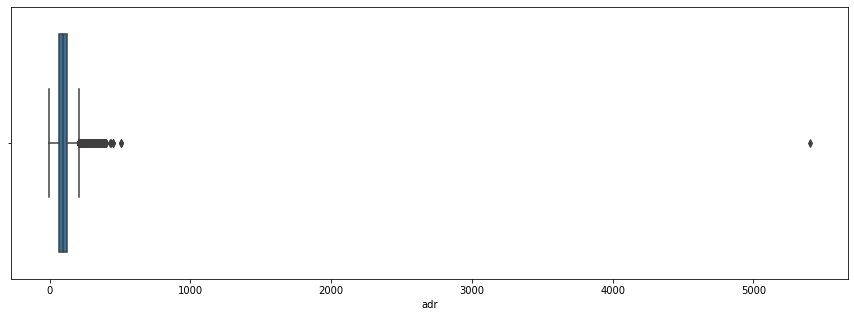

In [16]:
# box plot which shows outliers and quartile
plt.rcParams['figure.figsize']= (15,5)
sns.boxplot(x=df['adr'])

Clearly we can say that there are several outliers mostly they are Upper Side Outliers.


Perparing to get those Upper Side Outliers as well as Lower Side Outliers:-

In [17]:
# summary of adr column to get all the relevant data to find outliers
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Q1 = 25%(lower quartile), Q2 = 50%(median), Q3 = 75%(upper quartile), IQR = Interquartile Range

In [18]:
# creating variable and assigning corresponding values to them from summary
Q1 = 69.5
Q2 = 94.95
Q3 = 126.0
IQR = Q3 -Q1

In [19]:
lower_side_outlier_value = Q1 - 1.5*IQR    #Bellow this value: Lower Side Outliers
upper_side_outlier_value = Q3 + 1.5*IQR    #Above this value: Upper Side Outliers

In [20]:
df[df['adr'] < lower_side_outlier_value].shape, df[df['adr'] > upper_side_outlier_value].shape


((0, 32), (3864, 32))

There is not any lower side outlier.

But there are 3864 upper side outlier. Droping those ouliers:-

In [21]:
# droping outliers which are above (Q3+1.5*IQR)
df.drop(df[df['adr'] > upper_side_outlier_value].index, inplace=True)

Shape of df will change after droping.

In [22]:
# look for changed shape after droping outliers
df.shape

(115346, 32)

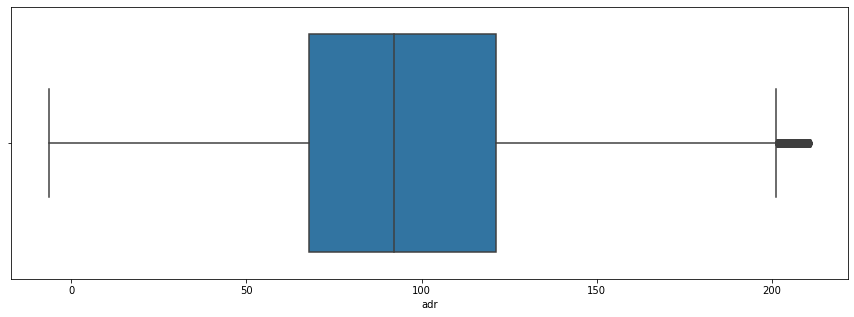

In [23]:
# box plot again to check for outliers compare to earlier
plt.rcParams['figure.figsize']= (15,5)
sns.boxplot(x=df['adr'])

Surely we got rid from very high adr values within data.

But what about adr values which are negative, zero or very small?

Getting such values and replacing those values with mean of data.

In [24]:
df['adr'].describe()

count    115346.000000
mean         97.101611
std          40.396522
min          -6.380000
25%          68.000000
50%          92.100000
75%         121.330000
max         210.750000
Name: adr, dtype: float64

In [25]:
# total number of negative and zero adr values
df[df['adr'] <= 0].shape

(1811, 32)

To replace low adr values:- Lets decide one value of adr bellow which all the value will get replaced.

Taking that value to be half of 25% quartile value, which come to be 34.

In [26]:
# total number of adr values which are less than 34(will also include number of negative and zero adr values)
df[df['adr'] <= 34].shape

(3984, 32)

In [27]:
# replace adr values bellow 34 with mean values
df.loc[df.adr <= 34, 'adr'] = df['adr'].mean()

In [28]:
# check for changes we made in adr values
df['adr'].describe()

count    115346.000000
mean         99.972771
std          37.120316
min          34.020000
25%          72.410000
50%          95.660000
75%         121.330000
max         210.750000
Name: adr, dtype: float64

Yeah! Now we have appropriate adr values.

Looking for datatype changes in columns:-

In [29]:
# changing datatype from float to int in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].astype(int)

In [30]:
# getting reservation_status_date in proper datetime datatype
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [31]:
# Check for datatypes of all column as required
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115346 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           115346 non-null  object        
 1   is_canceled                     115346 non-null  int64         
 2   lead_time                       115346 non-null  int64         
 3   arrival_date_year               115346 non-null  int64         
 4   arrival_date_month              115346 non-null  object        
 5   arrival_date_week_number        115346 non-null  int64         
 6   arrival_date_day_of_month       115346 non-null  int64         
 7   stays_in_weekend_nights         115346 non-null  int64         
 8   stays_in_week_nights            115346 non-null  int64         
 9   adults                          115346 non-null  int64         
 10  children                        115346 non-null  int64  

**We are done with all missing/null/na values, getting proper datatype of some column, reomving no guests rows and handelling adr values appropriately.**

Now in the next step, we will be looking for some trends within the categories inside each column.

# **STEP 3: Each column wise trying to get some conclusions and trends**

## **Column:** hotel

**Question:** What are the type of hotel?

In [32]:
# get types of hotel
types_of_hotel = df.hotel.unique()
print(f"Types of hotel are {types_of_hotel}.")

Types of hotel are ['Resort Hotel' 'City Hotel'].


**Question:**How many bookings were initialy made in each type of hotel?

Text(0.5, 1.0, 'Bookings Percentage For Types of Hotel')

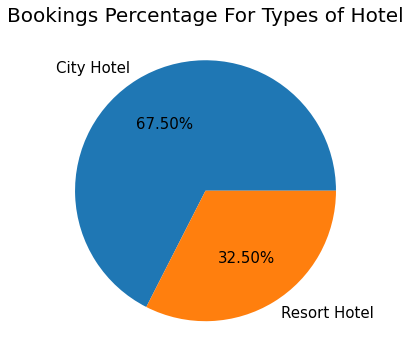

In [33]:
df.groupby('hotel').size().plot(kind='pie', labels=["City Hotel", "Resort Hotel"], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=20)
plt.title('Bookings Percentage For Types of Hotel', fontsize=20)

**Conclusion:** Bookings for resort hotel were 32.50% while bookings for city hotel were 67.50%, which were more than double of resort hotel.

## **Column:** is_canceled

In [34]:
categories_in_is_canceled = df.is_canceled.unique()
print(categories_in_is_canceled)

[0 1]


0 for Booking Not Canceled;
1 for Booking Canceled

In [35]:
# replace 0 by Not canceled and 1 by Canceled
df.is_canceled = df.is_canceled.replace(0,'Not_Canceled').replace(1, 'Canceled')

**Question:** How many bookings got canceled?

Text(0.5, 1.0, 'Bookings Cancelation Status')

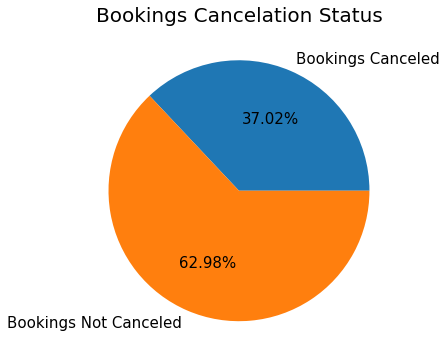

In [36]:
df.groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Canceled", "Bookings Not Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Bookings Cancelation Status', fontsize=20)

**Conclusion:** 38% of bookings got canceled.

## **Column:** lead_time

Booking **Lead Time** is the period of time between when a guest makes a reservation, and the actual check-in date

Lead time will be zero for same day booking

In [37]:
# getting percentage of bookings done with lead time
same_day_booking= round(df['lead_time'].value_counts(normalize=True) * 100, 2)[0]
print(f"Same day bookings are {same_day_booking}%")
# now onwards same day bookings will not consider
within_week_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:8].sum(), 0)
print(f"Within a week bookings are {within_week_booking}%")
within_month_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:31].sum(), 0)
print(f"Within a month bookings are {within_month_booking}%")
within_3_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:91].sum(), 0)
print(f"Within 3 months bookings are {within_3_months_booking}%")
within_6_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:181].sum(), 0)
print(f"Within 6 months bookings are {within_6_months_booking}%")
within_year_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:366].sum(), 0)
print(f"Within a year bookings are {within_year_booking}%")

Same day bookings are 5.32%
Within a week bookings are 11.0%
Within a month bookings are 27.0%
Within 3 months bookings are 52.0%
Within 6 months bookings are 74.0%
Within a year bookings are 93.0%


**Conlusion:**
1. 5.31% bookings were same day booking which means that people prefers to book hotel earlier.

2. Almost 60% of bookings were done before 90 days of arrival.


## **Column:** arrival_date_year

**Question:** How many bookings were made year basis?

Text(0.5, 1.0, 'Year WIse Bookings')

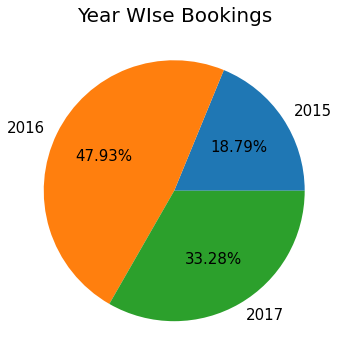

In [38]:
df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Year WIse Bookings', fontsize=20)

**Conclusion:** 

*   Bookings for year 2016 were highest among all years with 48%.
*   Bookings for year 2015 and 2017 were 18% and 34% respectively.
*   Bookings were increasing on year basis but for year 2016 increment was too high so there was steep fall in bookings for year 2017.






## **Column:** arrival_date_month

**Question:** How many bookings were made on month basis?

Text(0.5, 1.0, 'Monthly Bookings count')

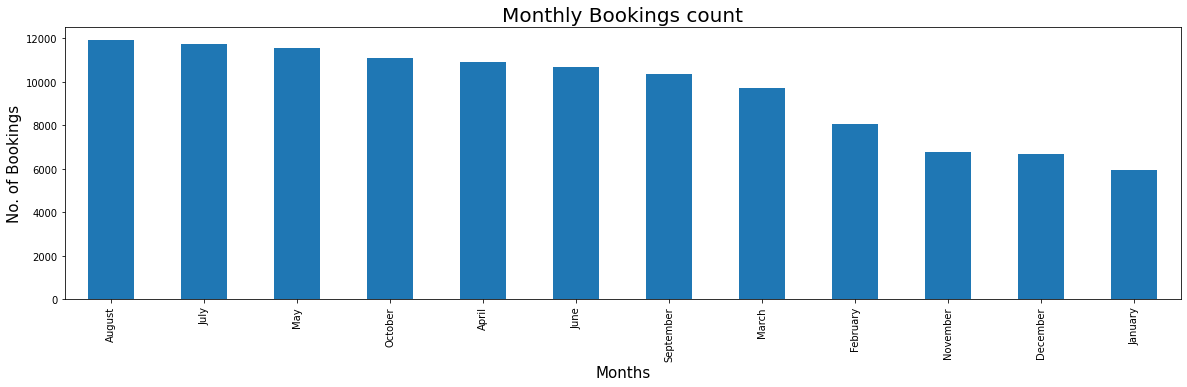

In [39]:
df['arrival_date_month'].value_counts().plot(kind='bar', figsize=(20,5))
plt.xlabel('Months' , fontsize=15)
plt.ylabel('No. of Bookings' , fontsize=15)
plt.title('Monthly Bookings count', fontsize=20)

**Conclusion:**
1. Highest hotel bookings were in month August.
2. Lowest hotel bookings were in month January.

## **Column:** arrival_date_week_number

**Question:** How many bookings were made week basis?

Text(0.5, 1.0, 'Weekly Bookings count')

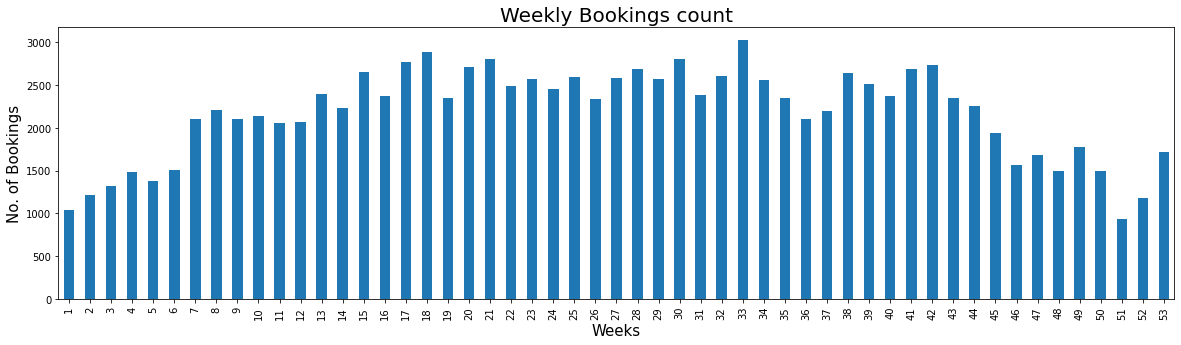

In [40]:
df['arrival_date_week_number'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.xlabel('Weeks' , fontsize=15)
plt.ylabel('No. of Bookings' , fontsize=15)
plt.title('Weekly Bookings count', fontsize=20)

**Conclusion:**
1. Highest hotel bookings were in week 33.
2. Lowest hotel bookings were in week 51.

## **Column:** arrival_date_day_of_month

**Question:** How many bookings were made on day basis?

Text(0.5, 1.0, 'Daily Bookings count')

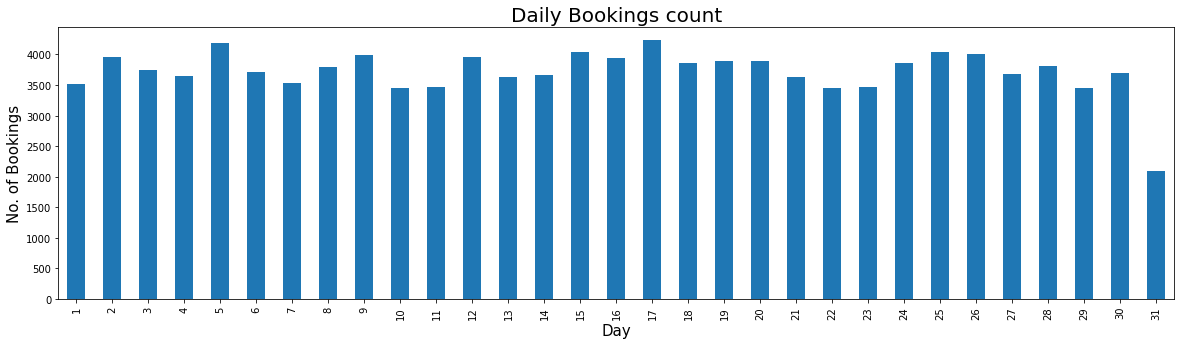

In [41]:
df['arrival_date_day_of_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.xlabel('Day' , fontsize=15)
plt.ylabel('No. of Bookings' , fontsize=15)
plt.title('Daily Bookings count', fontsize=20)

**Conclusion:** Nothing relevent here to conclude.

## **Column:** stays_in_weekend_nights

**Question:** How many stays in weekend nights were prefered by most of the guests?

Text(0.5, 1.0, 'Stays in weekend nights Vs. Bookings')

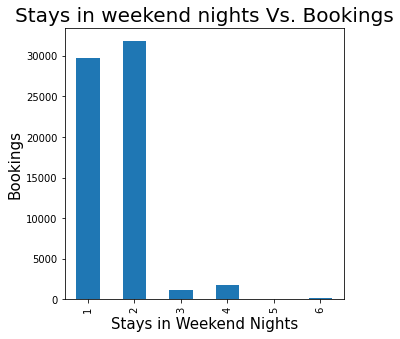

In [42]:
df['stays_in_weekend_nights'].value_counts().sort_index()[1:7].plot(kind='bar', figsize=(5,5))
plt.xlabel('Stays in Weekend Nights' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('Stays in weekend nights Vs. Bookings', fontsize=20)

**Conclusion:** Most of the bookings were for two stays in weekend nights.

## **Column:**stays_in_week_nights

**Question:** How many stays in week nights were prefered by most of the guests?

Text(0.5, 1.0, 'Stays in week nights Vs. Bookings')

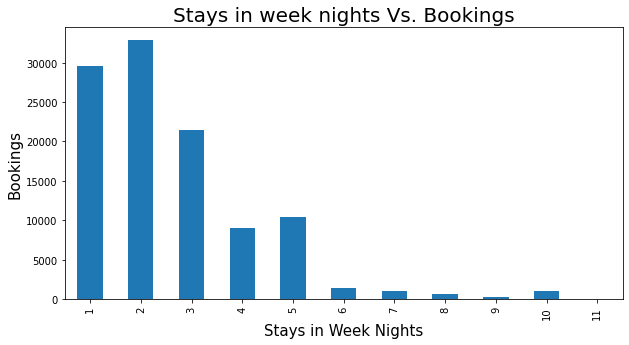

In [43]:
df['stays_in_week_nights'].value_counts().sort_index()[1:12].plot(kind='bar', figsize=(10,5))
plt.xlabel('Stays in Week Nights' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('Stays in week nights Vs. Bookings', fontsize=20)

**Conclusion:** Most of the bookings were for two stays in week nights.

## **Column:**adults

**Question:** How many adults were there in majority of bookings?

Text(0.5, 1.0, 'No. of Adults Vs. Bookings')

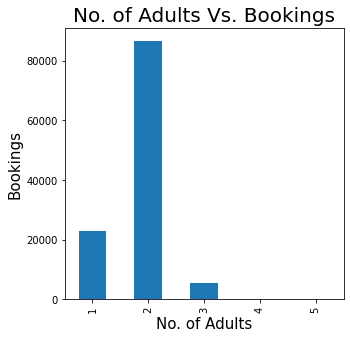

In [44]:
df['adults'].value_counts().sort_index()[1:6].plot(kind='bar', figsize=(5,5))
plt.xlabel('No. of Adults' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('No. of Adults Vs. Bookings', fontsize=20)

**Conclusion:** Majority of bookings consist of 2 adults at least.

## **Column:**children

Text(0.5, 1.0, 'Children WIse Bookings')

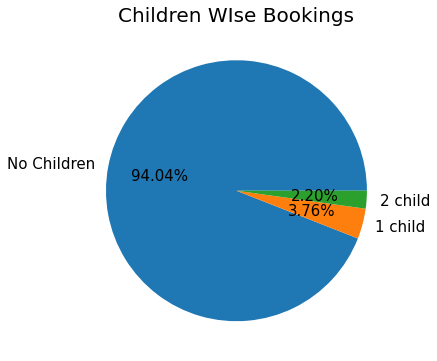

In [45]:
df.groupby('children').size()[0:3].plot(kind='pie', fontsize=15,labels=["No Children", "1 child", "2 child"], autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Children WIse Bookings', fontsize=20)

**Conclusion:**

*   94% of bookings did not consist of children.
*   3.91% of bookings had only child.
*   2.28% of bookings had two child.





## **Column:**babies

Text(0, 0.5, '')

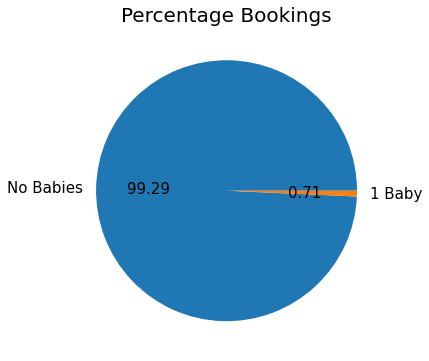

In [46]:
df.groupby('babies').size()[0:2].plot(kind='pie', labels=["No Babies", "1 Baby"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('Percentage Bookings', fontsize=20)
plt.ylabel('')

**Conclusion:**

*   99.29% of bookings did not consist of any babies.
*   0.71% of bookings had only one baby.





## **Column:** meal

**Question:** Which type of meal was prefered mostly?

Text(0, 0.5, '')

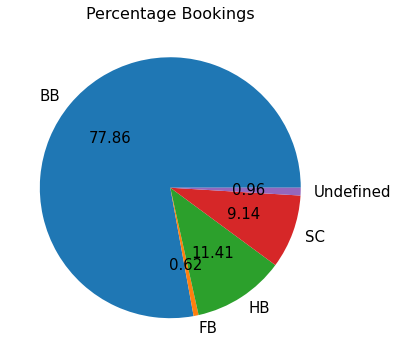

In [47]:
df.groupby('meal').size().plot(kind='pie', labels=["BB", "FB", "HB", "SC", "Undefined"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('Percentage Bookings', fontsize=16)
plt.ylabel('')

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- SC: Self Catering

**Conclusion:** BB (Bed & Breakfast) type meal were mostly prefered with 77%.

## **`Column:`** country

**Question:** Top country with highest bookings?

Text(0, 0.5, 'No. of Bookings')

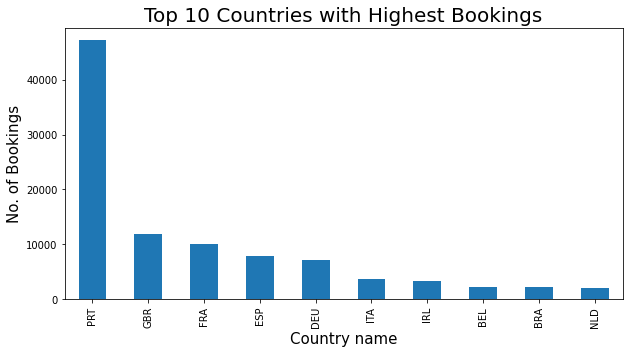

In [48]:
df['country'].value_counts()[:10].plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries with Highest Bookings', fontsize=20)
plt.xlabel('Country name', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:**

 Country which has highest number of bookings was PRT

**Question:** Top 10 countries weightage in total bookings?

In [49]:
weightage_of_top_10_countries_in_bookings = (df['country'].value_counts(normalize=True)*100)[:10].sum()
print(f"Above top 10 countries with highest bookings had weightage of {round(weightage_of_top_10_countries_in_bookings, 2)}% in total bookings.")

Above top 10 countries with highest bookings had weightage of 84.61% in total bookings.


## **Column:** market_segment

Text(0, 0.5, 'Percentage Bookings')

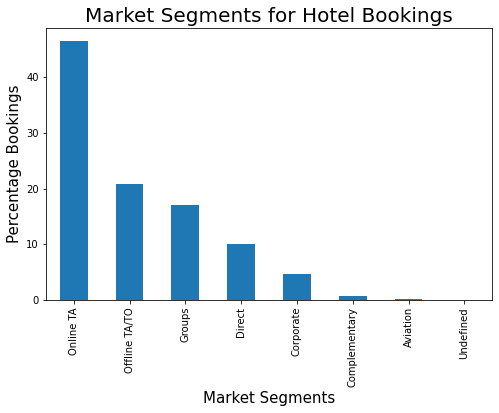

In [50]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2).plot(kind='bar', figsize=(8,5))
plt.title('Market Segments for Hotel Bookings', fontsize=20)
plt.xlabel('Market Segments', fontsize=15)
plt.ylabel('Percentage Bookings', fontsize=15)

In [51]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2)

Online TA        46.52
Offline TA/TO    20.87
Groups           17.07
Direct           10.12
Corporate         4.57
Complementary     0.63
Aviation          0.20
Undefined         0.00
Name: market_segment, dtype: float64

**Conclusion:**

Maximum bookings were from Online TA (Travel Agent) which 47.30%.

Bookings with Online TA and Offline TA/TO was almost 70% that means maximum hotel are booked with agents only.

Direct bookings were 10.56% which shows that maximum people have tendacy of booking hotel prior to arrival.

## **Column:** distribution_channel

Text(0, 0.5, 'Percentage Bookings')

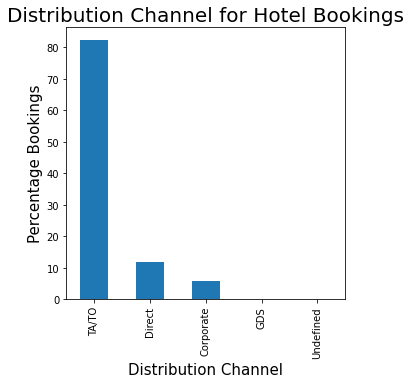

In [52]:
round(df['distribution_channel'].value_counts(normalize=True) * 100, 2).plot(kind='bar', figsize=(5,5))
plt.title('Distribution Channel for Hotel Bookings', fontsize=20)
plt.xlabel('Distribution Channel', fontsize=15)
plt.ylabel('Percentage Bookings', fontsize=15)

**Conclusion:**

Hotels prefers almost 82% of TA/TO as their Distribution Channel which justify with 70% bookings are through Online TA and Offline TA/TO.

## **Column:** is_repeated_guest

In [53]:
categories_in_is_repeated_guest = df.is_repeated_guest.unique()
print(categories_in_is_repeated_guest)

[0 1]


0 : guest not repeated

1 : guest repeated

Text(0.5, 1.0, 'Guest Repeated Or Not')

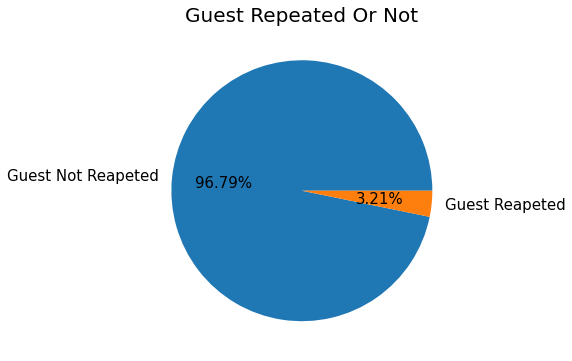

In [54]:
df.groupby('is_repeated_guest').size().plot(kind='pie', labels=['Guest Not Reapeted', 'Guest Reapeted'], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=15)
plt.title('Guest Repeated Or Not', fontsize=20)

**Conclusion:** Only 3.21% bookings are by repeated guest.

## **Column:** booking_changes

Text(0.5, 0, 'No. of Changes Made')

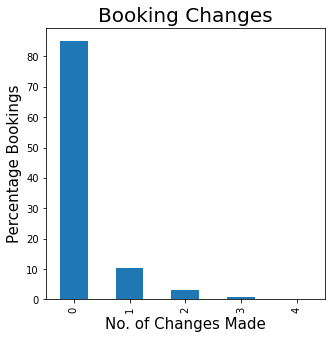

In [55]:
round(df['booking_changes'].value_counts(normalize=True) * 100, 2)[0:5].plot(kind='bar', figsize=(5,5))
plt.title('Booking Changes', fontsize=20)
plt.ylabel('Percentage Bookings', fontsize=15)
plt.xlabel('No. of Changes Made', fontsize=15)

**Conclusion:**

About 85% of bookings never changed.

About 10% bookings were changed once.

## **`Column:`** deposit_type

In [56]:
round(df['deposit_type'].value_counts(normalize=True) * 100, 2)

No Deposit    87.24
Non Refund    12.62
Refundable     0.14
Name: deposit_type, dtype: float64

Text(0.5, 1.0, 'Types of Deposit')

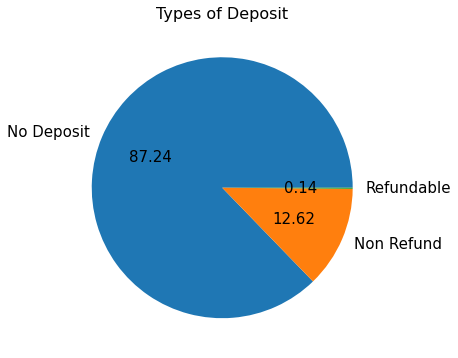

In [57]:
df.groupby('deposit_type').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Types of Deposit', fontsize=16)

**Conclusion:**

About 88% bookings are without any deposit. (Flexibility to cancel or change bookings without losing any money must be the main reason)

About 12.22% bookings are non refundable.(Those bookings might be done because of offer of lower prices than bookings without any deposit)

In next step we will deep dive into non refundable bookings.

## **Column:** days_in_waiting_list

In [58]:
wait_list_df = round(df['days_in_waiting_list'].value_counts(normalize=True) * 100, 2)[:5].sort_index().reset_index()
wait_list_df.columns =  ['Days', 'Percentage Bookings']
wait_list_df

,Days,Percentage Bookings
0,0,96.82
1,31,0.11
2,39,0.20
3,44,0.12
4,58,0.14


**Conclusion:**

Almost for 97% bookings there is no waiting list.(Which means that confirmed bookings are mostly prefered)

## **Column:** required_car_parking_spaces

In [59]:
car_parking_df = round(df['required_car_parking_spaces'].value_counts(normalize=True) * 100, 2).reset_index()
car_parking_df.columns =  ['No. of Request', 'Percentage Bookings']
car_parking_df

,No. of Request,Percentage Bookings
0,0,94.07
1,1,5.90
2,2,0.02
3,3,0.00
4,8,0.00


**Conclusion:**

*   Almost 94% of bookings there is no requirement for car parking spaces.

*   Alomst 5.83% of bookings there is requirement of one car parking space.






## **Column:** total_of_special_requests

Text(0.5, 1.0, 'Total Special Request')

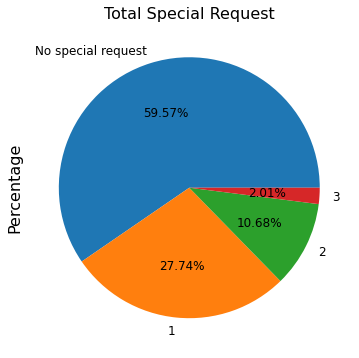

In [60]:
df.groupby('total_of_special_requests').size()[:4].plot(kind='pie', labels=["No special request", 1, 2, 3], fontsize=12, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('Percentage' , fontsize=16)
plt.title('Total Special Request', fontsize=16)

**Conclusion:**

*   About 59% of bookings there are no special requests.
*   27.92% of bookings there is one special request.



## **Column:** reservation_status

Text(0.5, 1.0, 'Reservation Status')

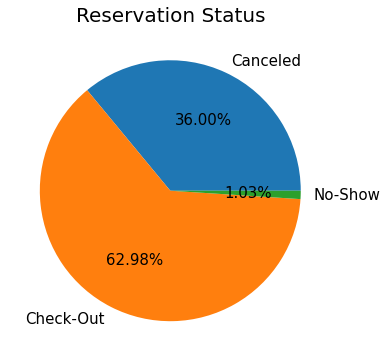

In [61]:
df.groupby('reservation_status').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Reservation Status', fontsize=20)

**Conclusion:** 

*   36% of bookings got canceled.
*   1% of bookings never arrived at hotel without cancelling bookings.



# **STEP 4: Trying to get some conclusions from data, correlation, trends and making sense in doing so**

Till now some conclusion were made with data within each column only.

Now will get conclusions based on correlation and trends considering multiple columns. 

## Looking various parameter with each hotel type

Text(0, 0.5, 'No. of Bookings')

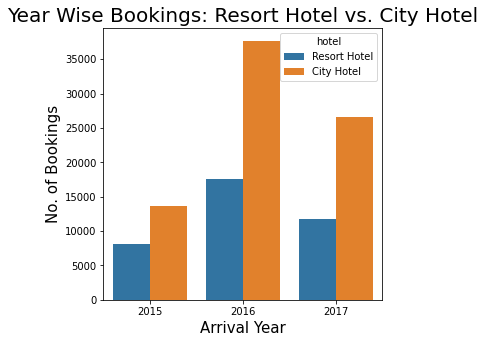

In [62]:
# year wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel')
plt.title('Year Wise Bookings: Resort Hotel vs. City Hotel',fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:**

*   For both type hotel there was sudden increase in bookings for year 2016 compared to year 2015 and then significant fall in bookings for year 2017.



Text(0, 0.5, 'No. of Bookings')

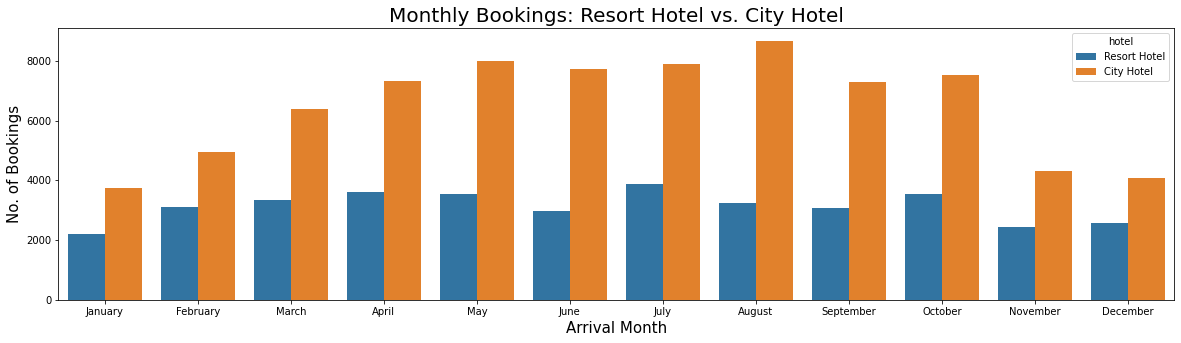

In [63]:
# Month wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order= [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Bookings: Resort Hotel vs. City Hotel',fontsize=20)
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:**

*   Highest number of bookings for city hotel and resort hotel is in August and July respectively.
*   Lowest number of bookings for both type of hotel is in January.



Text(0, 0.5, 'No. of Bookings')

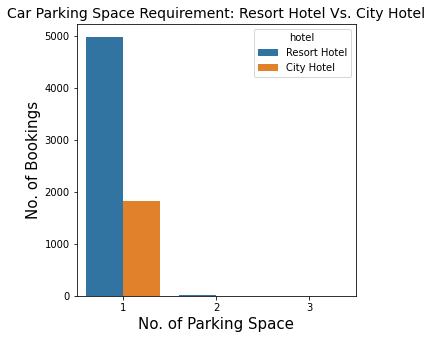

In [64]:
# Day wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'required_car_parking_spaces', hue = 'hotel', order=[1,2,3])
plt.title('Car Parking Space Requirement: Resort Hotel Vs. City Hotel',fontsize=14)
plt.xlabel('No. of Parking Space', fontsize=15)
plt.ylabel('No. of Bookings', fontsize=15)

**Conclusion:** Car parking space requirement for resort type hotel is greater than city hotel.(It may be because of location of resort type hotel is usually far from city)

Text(0, 0.5, 'No. of Bookings')

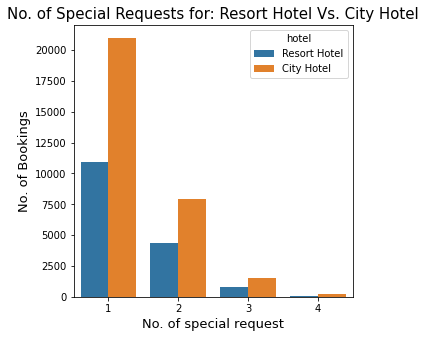

In [65]:
# Day wise bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel', order=[1,2,3,4])
plt.title('No. of Special Requests for: Resort Hotel Vs. City Hotel',fontsize=15)
plt.xlabel('No. of special request', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

**Conclusion:** Special requests for both type of hotel is almost same as compared to their number of bookings.

Text(0, 0.5, 'No. of Bookings')

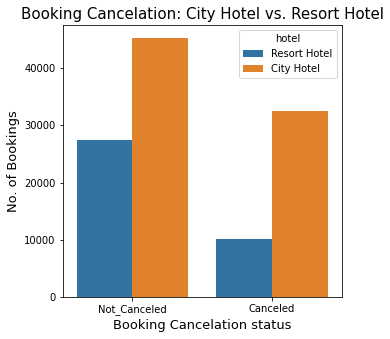

In [66]:
# canceled and not canceled bookings for each type of hotel
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Booking Cancelation: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Booking Cancelation status', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

**Conclusion:**

*   Cancelation of bookings in city hotel were higher than resort hotel.



Creating new DataFrame for non canceled bookings:-

In [67]:
# creating deep copy to insure that there will no copy and view error warning
non_canceled_df = df[df['is_canceled'] == 'Not_Canceled'].copy(deep=True)
canceled_df = df[df['is_canceled']== 'Canceled'].copy(deep=True)

Text(0.5, 1.0, 'Non Canceled Bookings: City Hotel vs. Resort Hotel')

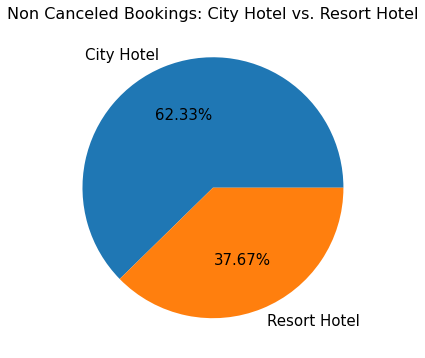

In [68]:
non_canceled_df.groupby('hotel').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Non Canceled Bookings: City Hotel vs. Resort Hotel', fontsize=16)

**Conclusion:**

*   Non cancelation of bookings in city hotel and resort hotel were 66% and 34% respectively.



Text(0.5, 1.0, 'Canceled Bookings: City Hotel vs. Resort Hotel')

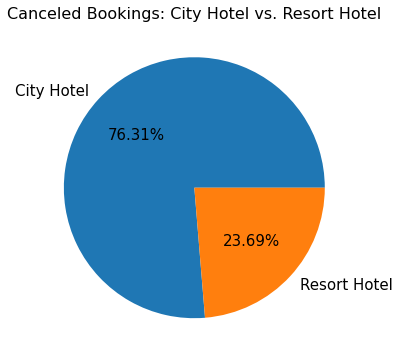

In [69]:
canceled_df.groupby('hotel').size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Canceled Bookings: City Hotel vs. Resort Hotel', fontsize=16)

**Conclusion:**

*   Cancelation of bookings in city hotel and resort hotel were 76% and 24% respectively.



In [70]:
actual_cancelation_hotel_wise = 100*canceled_df.groupby('hotel').size()/df.groupby('hotel').size()
actual_cancelation_hotel_wise

hotel
City Hotel      41.850967
Resort Hotel    26.992850
dtype: float64

**Conclusion:**

*   Actual canelation for city hotel and resort hotel is 42% and 27% respectively of total bookings in that hotel type.



In [71]:
actual_non_cancelation_hotel_wise = 100*non_canceled_df.groupby('hotel').size()/df.groupby('hotel').size()
actual_non_cancelation_hotel_wise

hotel
City Hotel      58.149033
Resort Hotel    73.007150
dtype: float64

**Conclusion:**

*   Actual bookings for which guests arrived for city hotel and resort hotel is 58% and 73% respectively of total bookings in that hotel type.



## **MILESTONE 1:** Have you ever wondered when the best time of year to book a hotel room is? 

Text(0, 0.5, 'Average adr')

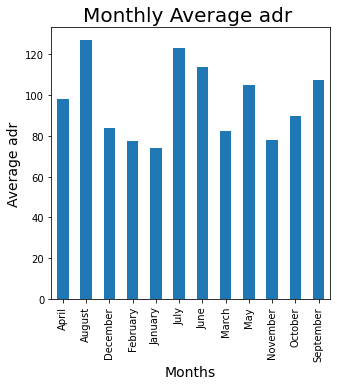

In [72]:
non_canceled_df.groupby(non_canceled_df['arrival_date_month'])['adr'].mean().plot(kind='bar', figsize=(5,5))
plt.title('Monthly Average adr ', fontsize=20)
plt.xlabel('Months' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)


**Conclusion:**

*   Average daily rate was highest in month of August.
*   Average daily rate was lowest in month of January.
*   So best time of year to book a hotel was January.



## **MILESTONE 2:** The optimal length of stay in order to get the best daily rate?

In [73]:
# total stay at hotel will be sum of number of night stay in week and weekend
non_canceled_df['length_of_stay'] = non_canceled_df['stays_in_weekend_nights'] + non_canceled_df['stays_in_week_nights']

Text(0, 0.5, 'Average adr')

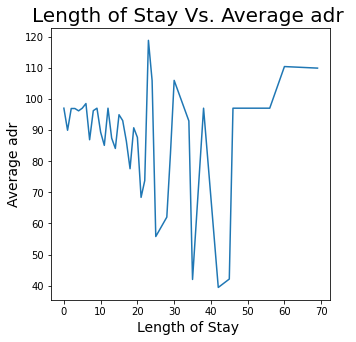

In [74]:
non_canceled_df.groupby(non_canceled_df['length_of_stay'])['adr'].median().plot(kind='line', figsize=(5,5))
plt.title('Length of Stay Vs. Average adr ', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

**Conclusion:**

*   Lowest value of adr is for 42 nights length of stay.
*   So to get beast daily rate one must stay for 42 nights.



Text(0, 0.5, 'No. of Bookings')

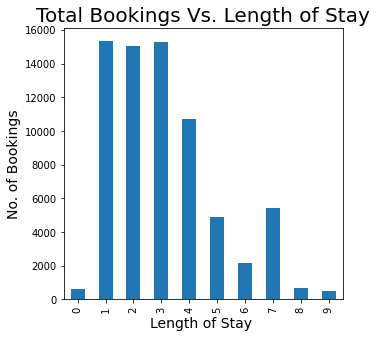

In [75]:
non_canceled_df.groupby(non_canceled_df['length_of_stay'])['hotel'].size()[:10].plot(kind='bar', figsize=(5,5))
plt.title('Total Bookings Vs. Length of Stay', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('No. of Bookings' , fontsize=14)

**Conclusion:**

*   Highest bookings were for 1, 2 and 3 nights stay.

*   Very low bookings were for stay at day time only.





Text(0, 0.5, 'No. of Bookings')

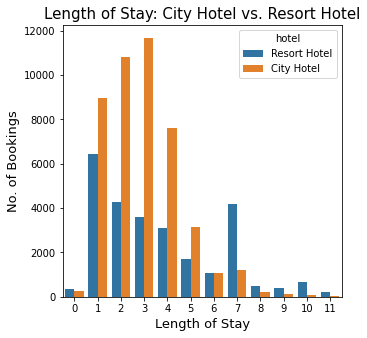

In [76]:
sns.countplot(data = non_canceled_df, x = 'length_of_stay', hue = 'hotel', order=[0,1,2,3,4,5,6,7,8,9,10,11])
plt.title('Length of Stay: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Length of Stay', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

**Conclusion:**

*   Bookings in resort type hotel decreases with increase in length of stay.
*   But bookings in city type hotel increases with increase in length of stay till length of stay is 3.
*   1 night stay was highest in resort type hotel.
*   3 night stay was highest in city type hotel.



## **MILESTONE 3:** What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? 

To answer above question, we need to find out correlations between number of special requests and other variables from given data.

In [77]:
# getting correlated dataframe
corr_non_canceled_df = non_canceled_df.corr()

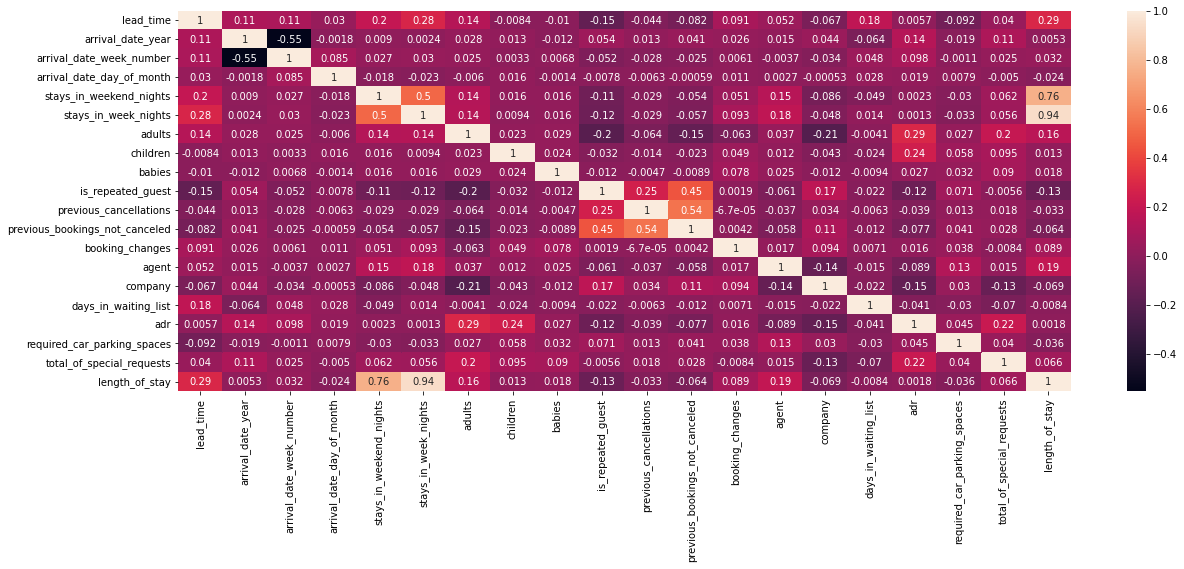

In [78]:
# pltting heatmap with annotation to get correlation values 
plt.figure(figsize=(20,7))
sns.heatmap(corr_non_canceled_df, annot=True)

**Conclusion:**

*   From heatmap, positive correlation of total number of special requests with adr is highest(0.22), then with adults(0.2) & then with arrival year(0.11).

*   So hotel may recieve high number of special request with high adr, adults and arrival year.





Lets check above three correlation with the help of plots in between them.

Text(0, 0.5, 'Average adr')

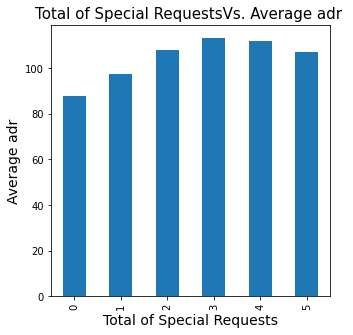

In [79]:
non_canceled_df.groupby(non_canceled_df['total_of_special_requests'])['adr'].median().plot(kind='bar', figsize=(5,5))
plt.title('Total of Special RequestsVs. Average adr ', fontsize=15)
plt.xlabel('Total of Special Requests' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

**Conclusion:**

*   With increase in adr values there is also increase in total number of special requests.



Text(0, 0.5, 'Average Total of Special Requests')

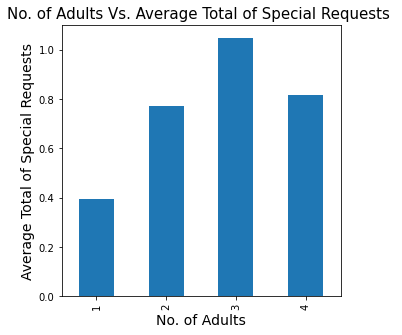

In [80]:
non_canceled_df.groupby(non_canceled_df['adults'])['total_of_special_requests'].mean()[1:].plot(kind='bar', figsize=(5,5))
plt.title('No. of Adults Vs. Average Total of Special Requests ', fontsize=15)
plt.xlabel('No. of Adults' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

**Conclusion:**

*   With increase in number of adults there is also increase in total number of special requests.



Text(0, 0.5, 'Average Total of Special Requests')

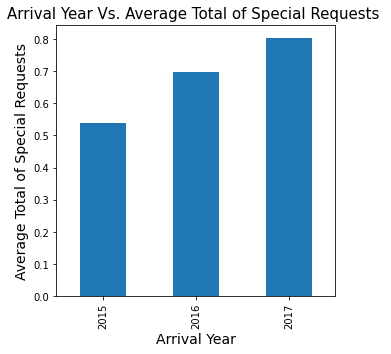

In [81]:
non_canceled_df.groupby(non_canceled_df['arrival_date_year'])['total_of_special_requests'].mean().plot(kind='bar', figsize=(5,5))
plt.title('Arrival Year Vs. Average Total of Special Requests ', fontsize=15)
plt.xlabel('Arrival Year' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

**Conclusion:**

*   With increase in year there is also increase in total number of special requests.



## **There bookings with no refund also. So lets deep dive into deposit types**

In [82]:
types_of_deposit = df['deposit_type'].unique()
print(f"There are deposit of type {types_of_deposit}.")

There are deposit of type ['No Deposit' 'Refundable' 'Non Refund'].


Text(0, 0.5, '')

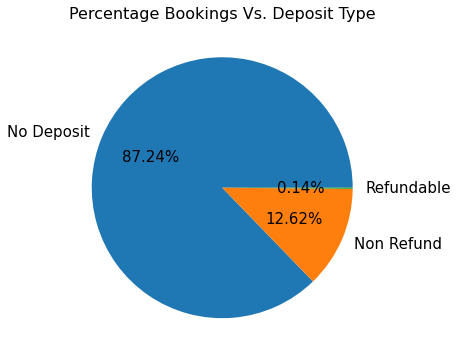

In [83]:
# getting percentage bookings for each type of deposit
df.groupby(df['deposit_type']).size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.title('Percentage Bookings Vs. Deposit Type', fontsize=16)
plt.ylabel('' , fontsize=16)


**Conclusion:**


*   87% of bookings were done without any amount of deposit.
*   12.62% of bookings were done with non refundable deposit.



Refundable deposit bookings are alomst neglegible (0.14%), so neglecting this values for next analysis.

**Question:** Why did they booked non refundable type deposit booking?

Text(0, 0.5, 'Average adr')

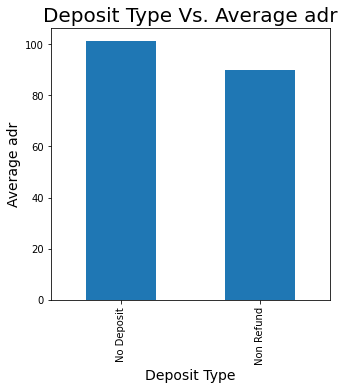

In [84]:
# getting average adr for each deposit type
df.groupby(df['deposit_type'])['adr'].mean()[:2].plot(kind='bar', figsize=(5,5))
plt.title('Deposit Type Vs. Average adr', fontsize=20)
plt.xlabel('Deposit Type' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

**Conclusion:**

*   Average daily rate were lower for non refundable depost bookings in comparison with no deposit type bookings.
*   This might be the main reason for bookings with non refundable type of deposit bookings.



Text(0, 0.5, 'Average Lead Time')

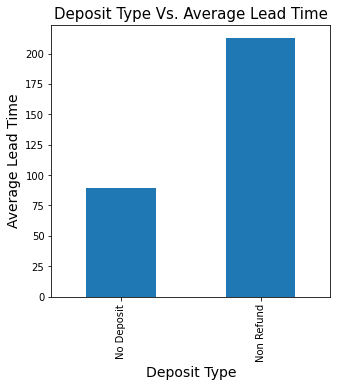

In [85]:
df.groupby(df['deposit_type'])['lead_time'].mean()[:2].plot(kind='bar', figsize=(5,5))
plt.title('Deposit Type Vs. Average Lead Time', fontsize=15)
plt.xlabel('Deposit Type' , fontsize=14)
plt.ylabel('Average Lead Time' , fontsize=14)

**Conclusion:**

*   Lead time for non refundable deposit type bookings was very much higher than no deposit type bookings.

*   Which means that non refundable deposit type bookings were booked very much before the arrival date.





**Question:** If non refundable deposit type bookings were done very much before arrival date, then there must lot of cancelation may be due to change in plan for any reason. So find out cancelation made in non refundable deposit type of bookings?

In [86]:
no_refund_df =df[df['deposit_type']=='Non Refund']

Text(0.5, 1.0, 'Canceled Bookings: City Hotel vs. Resort Hotel')

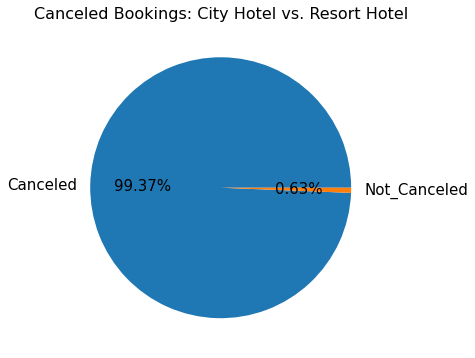

In [87]:
no_refund_df.groupby(no_refund_df['is_canceled']).size().plot(kind='pie', fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=16)
plt.title('Canceled Bookings: City Hotel vs. Resort Hotel', fontsize=16)

**Conclusion:**

*   99.37% of non 
refundable deposit type bookings were got canceled.


# **STEP 5: Final summary of conclusion**

We used the dataset which contains data about hotel bookings.
We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the given data to get some results and final conclusions.

Following are the results and conclusions:-

1.   Bookings for city hotel were more than double for resort hotel.

2.   Hotels prefered TA/TO as their main Distribution Channel.

3.   Bookings with Online TA and Offline TA/TO was almost 70% that means maximum hotel are booked with agents only.

4.   Direct bookings were only 10.56%  which means that guests prefers to book hotel earlier than their arrival date.

5.   Almost 60% of bookings were done within 90 days of arrival date.

6.   Confirmed bookings were mostly prefered by guests. No waiting list.

7.   Only 3.21% bookings were by repeated guest. Guests have tendancy to book hotel other than earlier booked hotel or location will be different for next bookings.

8.   Bookings for city and resort hotel were increasing on year basis but for year 2016 increment was too high so there was fall in bookings for year 2017.

9.   Highest number of bookings for city and resort hotel were in August and July respectively. So daily rates will also be highest in those months.

10.  Lowest number of bookings for both type of hotel is in January which results in lowest daily rate for January.

11.  So best time of year to book a hotel will be in January.

12.  Optimal length of stay to get best daily rate will be 42 because of lowest daily rate.

13.  Top 10 countries with highest bookings had weightage of 84.61% in total bookings. Highest bookings were from country PRT.

14.  Highest bookings were for two night stays in weekend as well as in week.

15.  1 night stay was highest in resort type hotel and 3 night stay was highest in city type hotel.

16.  Majority of bookings consist of 2 adults at least.

17.  BB (Bed & Breakfast) type meal were mostly prefered meal.

18.  Cancelation of bookings were higher in city hotel than in resort hotel

19.  Guests prefered no deposit type bookings because flexibility to cancel or change bookings without losing any money.

20.  But only 12.62% of bookings done with non refundable deposit type beacause of lower daily rate than no deposit type bookings. Such bookings were done many days before the arrival date, so cancelations in this bookings were around 99.37%.

21.  Car parking space requirement for resort type hotel is greater than city hotel.

22.  Special requests for both type of hotel is almost same as compared to their number of bookings.

23.  Hotel may recieve high number of special request with increase in adr, adults and arrival year.